<a id='start'></a>
# Анализ тарифных планов оператора сотовой связи

Федеральный оператор сотовой связи предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, для коммерческий департамента необходимо предоставить информацию, какой тариф приносит больше денег. Для анализа предоставлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год.

<b>Задача:</b><br>
1) Провести предварительный анализ тарифов на небольшой выборке клиентов; <br>
2) Проверить гипотезы о средней выручке:
- средняя выручка пользователей тарифов Ultra и Smart различается.
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<b>Описание тарифов</b>

<b>Тариф «Смарт»:</b><br>
1) Ежемесячная плата: 550 рублей;<br>
2) Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика;<br>
3) Стоимость услуг сверх тарифного пакета:<br>
- Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.<br>
- Сообщение — 3 рубля.<br>
- 1 Гб интернет-трафика — 200 рублей.
    
<b>Тариф «Ультра»</b><br>
1) Ежемесячная плата: 1950 рублей<br>
2) Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>
3) Стоимость услуг сверх тарифного пакета:<br>
- Минута разговора — 1 рубль;<br>
- Сообщение — 1 рубль;<br>
- 1 Гб интернет-трафика: 150 рублей.

<b>Ход исследования: </b>
1) Обзор данных.<br>

2) Предобработка данных:<br>
- привести данные о дате к типу данных "дата";
- выделить месяц из даты и создать соответствующий столбец;
- округлить данные;
- удалить лишние столбцы.

3) Исследовательский анализ данных и подсчет выручки.<br>

4) Проверка гипотез:<br>
1) средняя выручка пользователей тарифов «Ультра» и «Смарт» различается <br>
2) выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

5) Общий вывод по проекту.

<b>Описание данных:</b>

Имеется 5 датасетов:

1) <b>users</b> — информация о пользователях.

<b>user_id</b> — уникальный идентификатор пользователя;<br>
<b>first_name</b> — имя пользователя;<br>
<b>last_name</b> — фамилия пользователя;<br>
<b>age</b> — возраст пользователя (годы);<br>
<b>reg_date</b> — дата подключения тарифа (день, месяц, год);<br>
<b>churn_date</b> —  дата прекращения пользования тарифом (если значение пропущено, значит, тариф ещё действовал на момент выгрузки данных);<br>
<b>city</b> — город проживания пользователя;<br>
<b>tarif</b> — название тарифного плана.<br>

2) <b>calls</b> — информация о звонках.

<b>id</b> — уникальный номер звонка;<br>
<b>call_date</b> — дата звонка;<br>
<b>duration</b> — длительность звонка в минутах;<br>
<b>user_id</b> —  идентификатор пользователя, сделавшего звонок.<br>

3) <b>messages</b> — информация о сообщениях.

<b>id </b> — уникальный номер звонка;<br>
<b>message_date</b> — дата сообщения;<br>
<b>user_id</b> — идентификатор пользователя, отправившего сообщение.<br>

4) <b>internet</b> — информация об интернет-сессиях.

<b>id</b> —уникальный номер сессии;<br>
<b>mb_used</b> — объём потраченного за сессию интернет-трафика (в мегабайтах);<br>
<b>session_date</b> — дата интернет-сессии;<br>
<b>user_id</b> — идентификатор пользователя.<br>

5) <b>tariffs</b> — информация о тарифах.

<b>tariff_name</b> — название тарифа;<br>
<b>rub_monthly_fee</b> — оежемесячная абонентская плата в рублях;<br>
<b>minutes_included</b> — количество минут разговора в месяц, включённых в абонентскую плату;<br>
<b>messages_included</b> — количество сообщений в месяц, включённых в абонентскую плату;<br>
<b>mb_per_month_included</b> — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);<br>
<b>rub_per_minute</b> — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);<br>
<b>rub_per_message</b> — стоимость отправки сообщения сверх тарифного пакета;<br>
<b>rub_per_gb</b> — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).<br>

### 1. Обзор данных

In [1]:
#Подключим необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Загрузим данные
calls = pd.read_csv('/datasets/calls.csv')
sessions = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
#Базовая функция для ознакомления с данными: инфо о типах, пропусках, явных дубликатах
def show_data(df):
    display(df.head(5))
    print('-----')
    print('Информация о типах данных')
    df.info()
    print('-----')
    for col in df.columns:
        print('Название:', col, '\nПропусков:\t', df[col].isna().sum(), 'Процент пропусков:\t', round(df[col].isna().sum() *100 / len(df[col])))
    round(df[col].isna().sum() *100 / len(df[col]))
    print('-----')
    print('Явных дубликатов')
    print(df.duplicated().sum())

In [4]:
show_data(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


-----
Информация о типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
-----
Название: id 
Пропусков:	 0 Процент пропусков:	 0
Название: call_date 
Пропусков:	 0 Процент пропусков:	 0
Название: duration 
Пропусков:	 0 Процент пропусков:	 0
Название: user_id 
Пропусков:	 0 Процент пропусков:	 0
-----
Явных дубликатов
0


In [5]:
show_data(sessions)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


-----
Информация о типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
-----
Название: Unnamed: 0 
Пропусков:	 0 Процент пропусков:	 0
Название: id 
Пропусков:	 0 Процент пропусков:	 0
Название: mb_used 
Пропусков:	 0 Процент пропусков:	 0
Название: session_date 
Пропусков:	 0 Процент пропусков:	 0
Название: user_id 
Пропусков:	 0 Процент пропусков:	 0
-----
Явных дубликатов
0


In [6]:
show_data(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


-----
Информация о типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
-----
Название: id 
Пропусков:	 0 Процент пропусков:	 0
Название: message_date 
Пропусков:	 0 Процент пропусков:	 0
Название: user_id 
Пропусков:	 0 Процент пропусков:	 0
-----
Явных дубликатов
0


In [7]:
show_data(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


-----
Информация о типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
-----
Название: messages_included 
Пропусков:	 0 Процент пропусков:	 0
Название: mb_per_month_included 
Пропусков:	 0 Процент пропусков:	 0
Название: minutes_included 
Пропусков:	 0 Процент пропусков:	 0
Название: rub_monthly_fee 
Пропусков:	 0 Процент пропусков:	 0
Название: rub_per_gb 
Пропусков:	 0 

In [8]:
show_data(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


-----
Информация о типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
-----
Название: user_id 
Пропусков:	 0 Процент пропусков:	 0
Название: age 
Пропусков:	 0 Процент пропусков:	 0
Название: churn_date 
Пропусков:	 462 Процент пропусков:	 92
Название: city 
Пропусков:	 0 Процент пропусков:	 0
Название: first_name 
Пропусков:	 0 Процент пропусков:	 0
Название: last_name 
Пропусков:	 0 Процент пропусков:	 0
Название: reg_date 
Пропусков:	 0 Процент пропусков:	 0
Название: tariff 

<b>Вывод: </b> Для анализа предоставлены 5 датасетов:

1) <b>Информация о звонках</b> содержит более 200 тыс. уникальных id звонков. Явных дубликатов и пропусков не обнаружено, имеются столбцы с информацией о дате с некорректным форматом, который будет переопределен на этапе предобработки.

2) <b>Информация об интернет-сессиях</b> содержит почти 150 тыс. уникальных id сессий. Явных дубликатов и пропусков также не обнаружено, имеются столбцы с информацией о дате с некорректным форматом, который будет переопределен на этапе предобработки.

3) <b>Информация о сообщениях</b> содержит более 120 тыс. уникальных id номеров отправки сообщений. Явных дубликатов и пропусков также не обнаружено, имеются столбцы с информацией о дате с некорректным форматом, который будет переопределен на этапе предобработки.

4) <b>Информация о тарифах</b> содержит данные о двух таривах - `smart` и `ultra` сообщений.

5) <b>Информация о пользователях</b> содержит данные о 500 пользователей. учатсвующих в анализе. Явных дубликатов не обнаружено, имеются столбцы с информацией о дате с некорректным форматом, который будет переопределен на этапе предобработки. Имеются пропуски по информации о дате прекращения тарифа, но это допустимо, т.к. большинство пользователей еще используют такие тарифы.

### 2. Предобработка данных

<u><b>Преобразование типов данных

In [9]:
# обработка столбца reg_date
users ['reg_date'] = pd.to_datetime(users ['reg_date'], format='%Y-%m-%d')
# обработка столбца churn_date
users ['churn_date'] = pd.to_datetime(users ['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [10]:
# обработка столбца call_date
calls ['call_date'] = pd.to_datetime(calls ['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [11]:
# обработка столбца message_date
messages ['message_date'] = pd.to_datetime(messages ['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [12]:
# обработка столбца session_date
sessions ['session_date'] = pd.to_datetime(sessions ['session_date'], format='%Y-%m-%d')
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


Для корректного отображения информации о дате все столбцы с такой инфомарции были переведены в тип "datetime64" методом to_datetime

<u><b>Округление данных

In [13]:
calls ['duration'] = np.ceil(calls ['duration']).astype(int)

In [14]:
calls['duration'].head()

0     0
1     0
2     3
3    14
4     6
Name: duration, dtype: int64

Значения были округлены с помощью метода np.ceil() и приведены к типу int

<u><b>Удаление лишних столбцов

Удалим столбец Unnamed: 0 из датафрейма sessions. Столбец с таким названием возникает, когда данные сохраняют с указанием индекса (df.to_csv(..., index=column))

In [15]:
sessions = sessions.drop(['Unnamed: 0'],axis=1)

<u><b>Создание столбцов с информацией о месяце

In [16]:
calls ['month'] = calls['call_date'].dt.month
calls.columns

Index(['id', 'call_date', 'duration', 'user_id', 'month'], dtype='object')

In [17]:
messages ['month'] = messages['message_date'].dt.month
messages.columns

Index(['id', 'message_date', 'user_id', 'month'], dtype='object')

In [18]:
sessions ['month'] = sessions['session_date'].dt.month
sessions.columns

Index(['id', 'mb_used', 'session_date', 'user_id', 'month'], dtype='object')

При помощи метода dt.month выделили информацию о месяце в таблицах с информацией о звонках, сообшения и сессиях в интернете.

### 3. Исследовательский анализ данных и подсчет выручки

<u><b>Подсчет количество звонков для каждого пользователя по месяцам

In [19]:
# подсчёт количества звонков для каждого пользователя по месяцам
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))
calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

<u><b>Подсчет количество израсходованных минут для каждого пользователя по месяцам

In [20]:
# подсчёт израсходованных минут для каждого пользователя по месяцам
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))
minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

<u><b>Подсчет количество отправленных сообщений для каждого пользователя по месяцам

In [21]:
# подсчёт количества отправленных сообщений для каждого пользователя по месяцам
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))
messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

<u><b>Подсчет количество потраченных мегабайт для каждого пользователя по месяцам

In [22]:
# подсчёт потраченных мегабайт для каждого пользователя по месяцам
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
sessions_per_month.head(30)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

<u><b>Детальный анализ полученных результатов

In [23]:
#подсчет процента ушедших пользователей
proc = users['churn_date'].count() / users['churn_date'].shape[0] * 100
print(f'Расторгли договор {proc}% клиентов из датасета')

Расторгли договор 7.6% клиентов из датасета


Объединяем все посчитанные выше значения в один датафрейм user_behavior. Для каждой пары «пользователь — месяц» будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах. Объединять будем методом `merge`.

In [24]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице `user_behavior` после объединения:

In [25]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Заполним образовавшиеся пропуски в данных

In [26]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Присоединяем информацию о тарифах

In [27]:
# переименование столбца tariff_name на более простое tariff
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})
user_behavior = user_behavior.merge(tariffs, on='tariff')

Считаем количество минут разговора, сообщений и мегабайт, превышающих включённые в тариф

In [28]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец `paid_gb`

In [29]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)
user_behavior.columns

Index(['user_id', 'month', 'calls', 'messages', 'mb_used', 'minutes', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'paid_minutes', 'paid_messages', 'paid_mb', 'paid_gb'],
      dtype='object')

Считаем выручку за минуты разговора, сообщения и интернет

In [30]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Считаем помесячную выручку с каждого пользователя, она будет храниться в столбце `total_cost`

In [31]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']
user_behavior.columns

Index(['user_id', 'month', 'calls', 'messages', 'mb_used', 'minutes', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'paid_minutes', 'paid_messages', 'paid_mb', 'paid_gb', 'cost_minutes',
       'cost_messages', 'cost_gb', 'total_cost'],
      dtype='object')

Датафрейм `stats_df` для каждой пары «месяц — тариф» будет хранить основные характеристики

In [32]:
# сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


Распределение среднего количества звонков по видам тарифов и месяцам

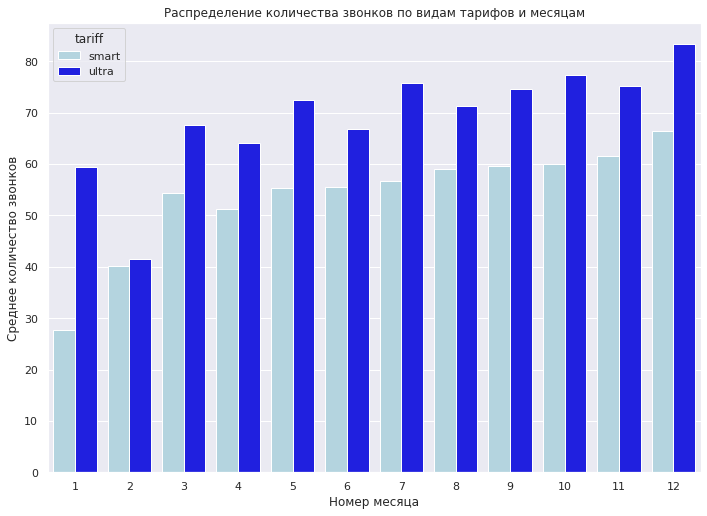

In [33]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

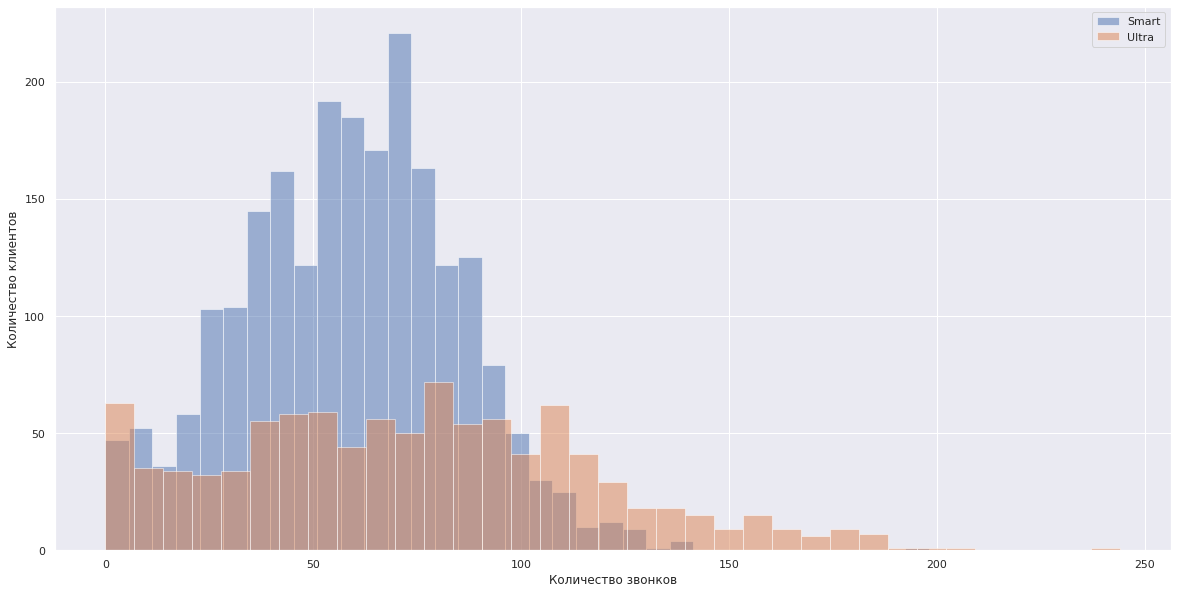

In [34]:
plt.figure(figsize=(20,10)) 
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

Распределение средней продолжительности звонков по видам тарифов и месяцам

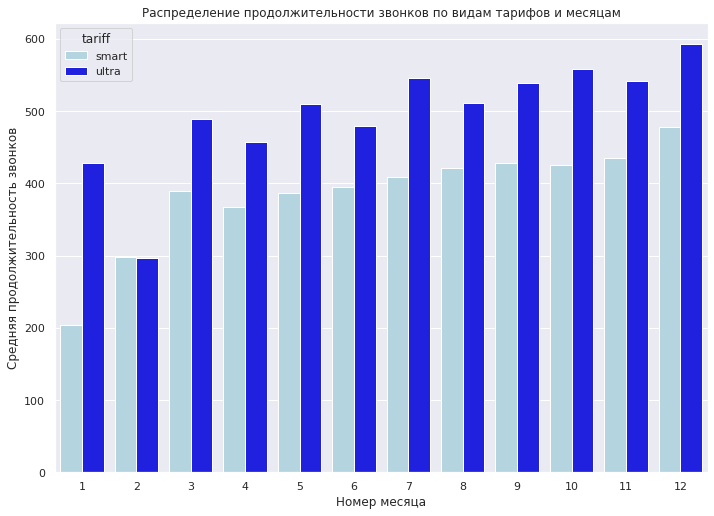

In [35]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

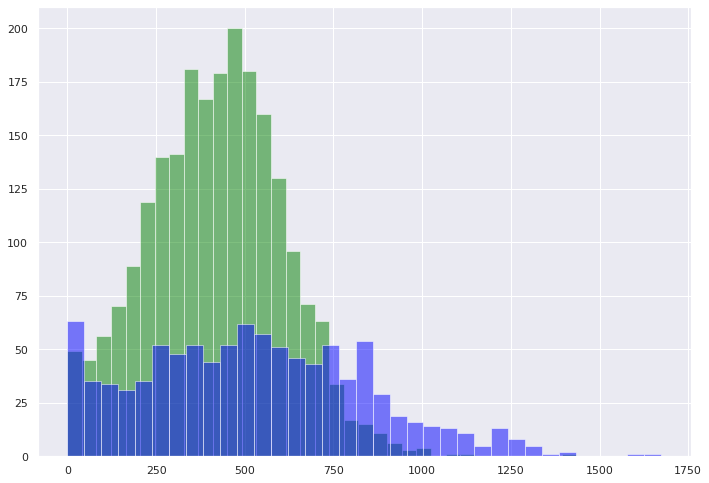

In [36]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue');

<b>Краткий вывод:</b> Средняя длительность разговоров у абонентов тарифа `Ultra` больше, чем у абонентов тарифа `Smart`. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа `Smart` равномерный в течение года. Пользователи тарифа `Ultra` не проявляют подобной линейной стабильности. Стоит отметить, что в феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

Распределение среднего количества сообщений по видам тарифов и месяцам

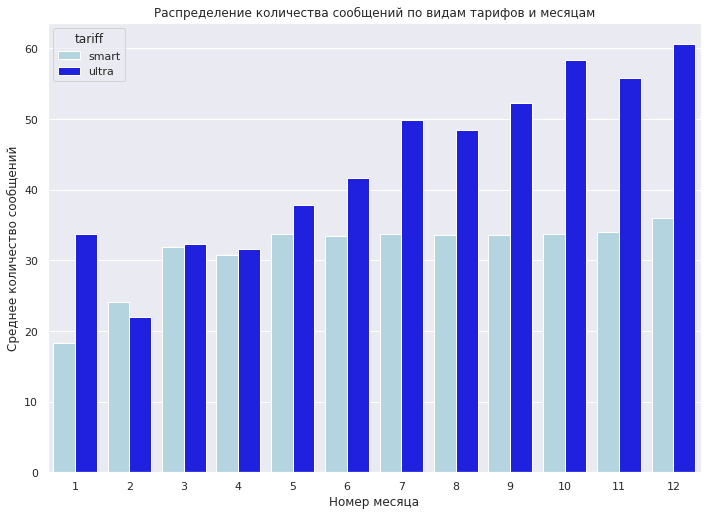

In [37]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

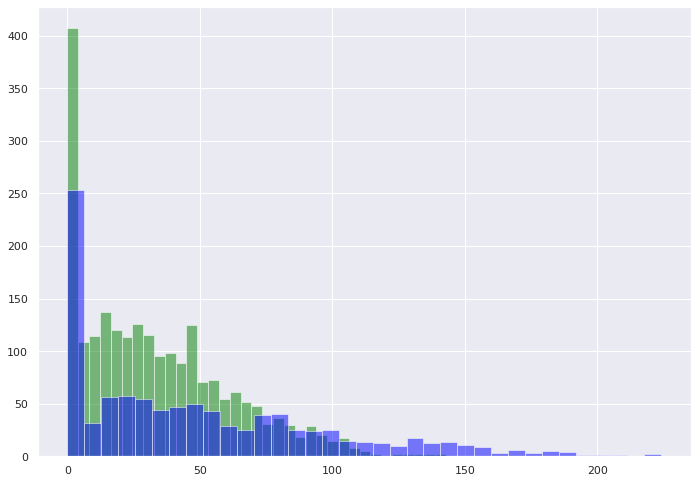

In [38]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');

<b>Краткий вывод:</b> В среднем пользователи тарифа `Ultra` отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа `Smart`. Количество сообщений в течение года на обоих тарифах растёт. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа `Ultra` также проявляют нелинейную положительную динамику.

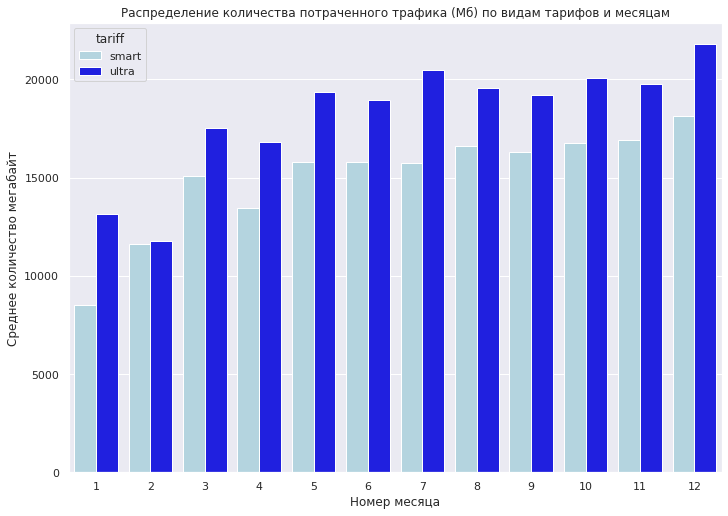

In [39]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue='tariff',
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra

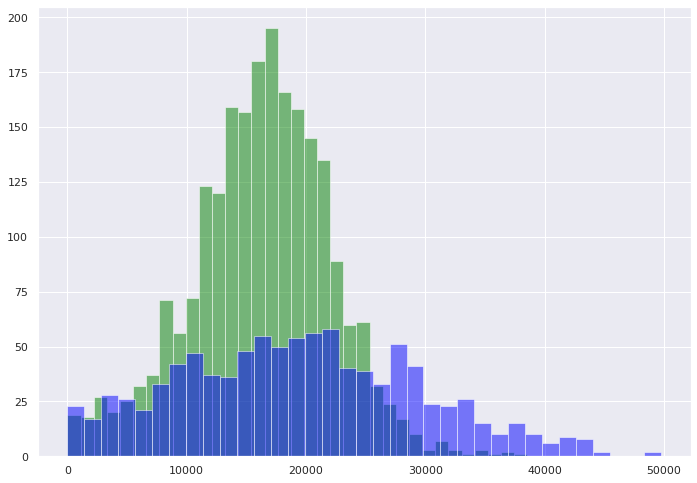

In [40]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');

<b>Краткий вывод:</b> Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа `Smart` тратят 15–17 Гб, а абоненты тарифного плана `Ultra` — 19–21 ГБ.

### 4. Проверка гипотез

<b><u>Проверка гипотезы о средней выручке пользователей тарифов «Ультра» и «Смарт»

Сформулируем гипотезы:

Нулевая $H_{0}$: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая (равна).
Альтернативная $H_{1}$: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Уровень значимости зададим 0,05.

In [41]:
smart_data = user_behavior.query('tariff == "smart"')
ultra_data = user_behavior.query('tariff == "ultra"')

alpha = 0.05

# вызов метода для проверки гипотезы
results = st.ttest_ind(smart_data['total_cost'], ultra_data['total_cost'], equal_var=False)

# вывод значения p-value на экран 
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средняя выручка тарифов различается.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу. Средняя выручка тарифов различается.


Значение p-value стремится к 0, значит вероятность верности нашей нулевой гипотеза - 0%. Значит, мы можем быть уверены в том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» точно не одинаковая.

<b><u>Проверка гипотезы о средней выручке пользователей из Москвы и других регионов

Сформулируем гипотезы:

Нулевая $H_{0}$: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов (выручка по Москве и регионам равна).
Альтернативная $H_{1}$: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Уровень значимости зададим 0,05.

In [42]:
moscow_data = user_behavior.query('city == "Москва"')
non_moscow_data = user_behavior.query('city != "Москва"')

alpha = 0.05
results = st.ttest_ind(moscow_data['total_cost'], non_moscow_data['total_cost'], equal_var=False)
print('p-значение:', round(results.pvalue,5))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средняя выручка тарифов различается.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

p-значение: 0.52574
Не можем отвергнуть нулевую гипотезу.


Значение p-value больше 50%, значит, наша нулевая гипотеза подтвердилась и выручка пользователей из Москвы не отличается от выручки пользователей регионов.

### 5. Общий вывод

<b><i>1) В части ознакомления данных</i></b><br><br>
<div style="text-align: justify ">Для анализа предоставлены 5 датасетов: <b>информация о звонках, интернет-сессиях, тарифах, сообщениях и пользователях.</b> В исследовании принимали участие 500 пользователей, которые использовали 2 тарифа. Каких-либо дубликатов и пропусков в данных не присутствует.</div>

<b><i>2) В части предобработки данных</i></b><br>
- для корректного отображения информации о дате все столбцы с такой инфомарции были переведены в тип "datetime64" методом to_datetime;<br>
- значения были округлены с помощью метода np.ceil() и приведены к типу int;<br>
- были удалены лишние столбцы;<br>
- выделена и добавлена в отдельный столбец информация о месяце события.

<b><i>3) Исследовательский анализ данных и подсчет выручки.</i></b><br>
В ходе проведения анализа стало известно:
- что договор расторгли около 8% клиентов;
- <div style="text-align: justify ">средняя длительность разговоров у абонентов тарифа `Ultra` больше, чем у абонентов тарифа `Smart`. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа `Smart` равномерный в течение года. Пользователи тарифа `Ultra` не проявляют подобной линейной стабильности. Стоит отметить, что в феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели;</div>
- <div style="text-align: justify ">в среднем пользователи тарифа `Ultra` отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа `Smart`. Количество сообщений в течение года на обоих тарифах растёт. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа `Ultra` также проявляют нелинейную положительную динамику;</div>
- <div style="text-align: justify ">меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа `Smart` тратят 15–17 Гб, а абоненты тарифного плана `Ultra` — 19–21 ГБ.</div>

<b><i>4) Проверка гипотез.</i></b><br>
- <div style="text-align: justify ">при проверки гипотезы о средней выручки тарифов `smart` и `ultra` было определено, что значение p-value стремится к 0, что означает что выручка тарифов `smart` и `ultra`разная;</div>
- <div style="text-align: justify ">при проверки гипотезы о средней выручки пользователей из Москвы стало известно, что значение p-value больше 50%. Такое значение позволяет сделать вывод, что предположение о том, что выручка пользователей из Москвы не отличается от выручки пользователей регионов.</div>